In [27]:
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from superdarn_cluster.dbtools import *
from pandas import DataFrame
import sklearn.preprocessing

start_time = dt.datetime(2018, 2, 7)
rad = 'cvw'
db_path = "./Data/cvw_GSoC_2018-02-07.db"

s = start_time
e = start_time + dt.timedelta(1)
data_dict = read_db(db_path, rad, s, e)
data_flat_unscaled = flatten_data_11_features(data_dict, remove_close_range=True)

/home/esther/clustering_superdarn_data/venv/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [28]:
num_components = 5
pca = PCA(n_components=num_components)
pca.fit(preprocessing.scale(data_flat_unscaled))
feature_names = ['beam', 'gate', 'vel', 'wid', 'power', 'freq', 'time', 'phi0', 'elev', 'nsky', 'nsch']

components = DataFrame(pca.components_, columns=feature_names)
print("PCA components 0-" + str(num_components-1) + " with feature correlations")
print("(Each PCA component is a linear combination of all features,")
print("with component 0 having the highest importance)")
print(components)
print()
print('Explained variance of PCA components')
print(pca.explained_variance_)


PCA components 0-4 with feature correlations
(Each PCA component is a linear combination of all features,
with component 0 having the highest importance)
       beam      gate       vel       wid     power      freq      time  \
0  0.133938 -0.490125 -0.019156 -0.119264 -0.123123 -0.510853 -0.368072   
1  0.496712  0.165938 -0.209692  0.551324 -0.563347  0.002319 -0.004313   
2  0.307987 -0.059960  0.305682 -0.261038 -0.209390  0.059210 -0.029801   
3  0.073078  0.010646  0.772297 -0.181556 -0.244102  0.071650 -0.120303   
4 -0.579623  0.289316  0.209946  0.221235 -0.220490  0.065174  0.074933   

       phi0      elev      nsky      nsch  
0 -0.080960  0.173061  0.416098  0.325574  
1 -0.219469  0.096857 -0.034569 -0.041072  
2  0.554973  0.546858 -0.200841 -0.210576  
3 -0.472457 -0.234054 -0.064752 -0.061315  
4 -0.044232  0.509542  0.169903  0.371990  

Explained variance of PCA components
[3.09509339 1.41967058 1.22731247 1.01740295 0.8693265 ]


In [29]:

importance_matrix = np.abs(pca.components_) * pca.explained_variance_ratio_.reshape(num_components,1)
print(importance_matrix.shape)
feature_importance = np.sum(importance_matrix, axis=0)
print(feature_importance)

(5, 11)
[0.18872148 0.18986196 0.15458104 0.16811283 0.17071358 0.16242205
 0.12449491 0.16021822 0.18412604 0.16336396 0.15547178]


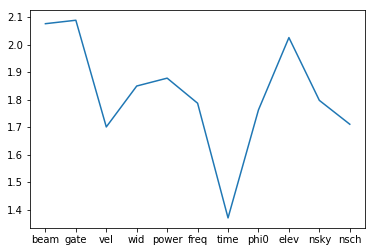

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(feature_importance)
_ = plt.xticks(range(len(feature_names)), feature_names)

In [30]:
indices = np.argsort(feature_importance)[::-1]
print(indices)
print('Importance order:')
print(np.array(feature_names)[indices])

[ 1  0  8  4  3  9  5  7 10  2  6]
Importance order:
['gate' 'beam' 'elev' 'power' 'wid' 'nsky' 'freq' 'phi0' 'nsch' 'vel'
 'time']


In [24]:
range_max = data_dict['nrang'][0]
vel = data_flat_unscaled[:, 2]
gate = data_flat_unscaled[:, 1]
time = data_flat_unscaled[:, 6]
pca_data = pca.transform(preprocessing.scale(data_flat_unscaled))
print(pca_data.shape)
print(data_flat_unscaled.shape)
feat_indicies = [0, 1, 2, 3, 4, 5, 6, -2]
#feature_names = ['PC' + str(i) for i in range(num_components)]

(210845, 5)
(210845, 11)


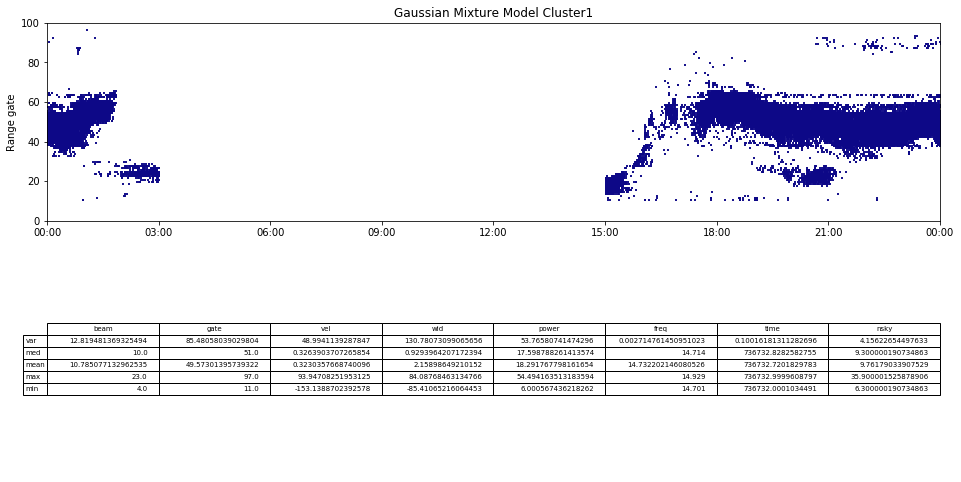

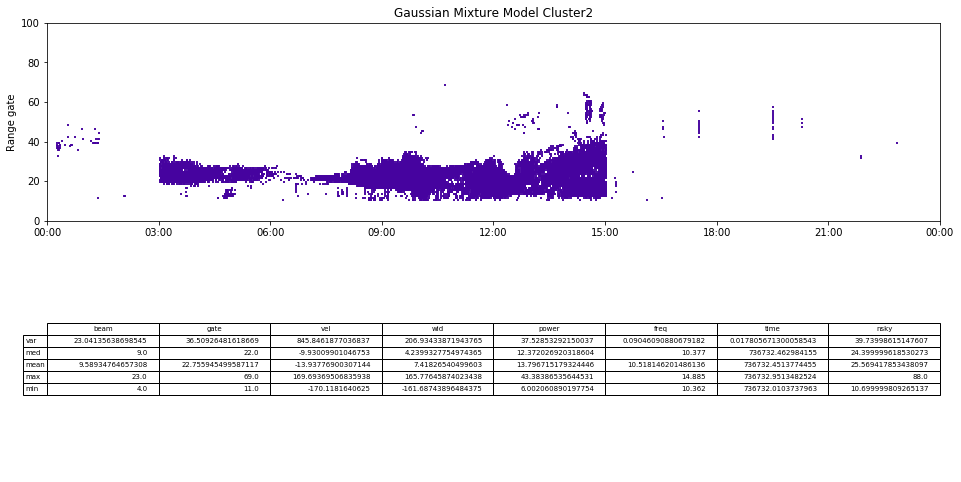

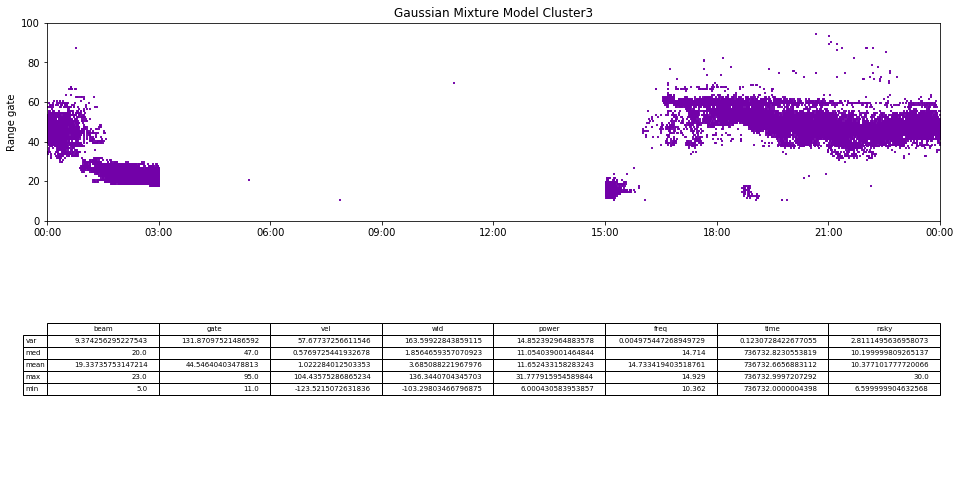

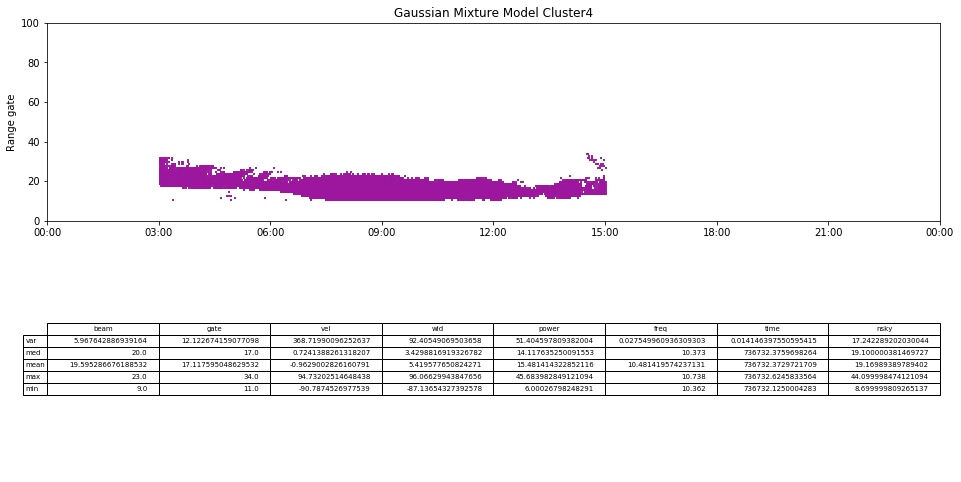

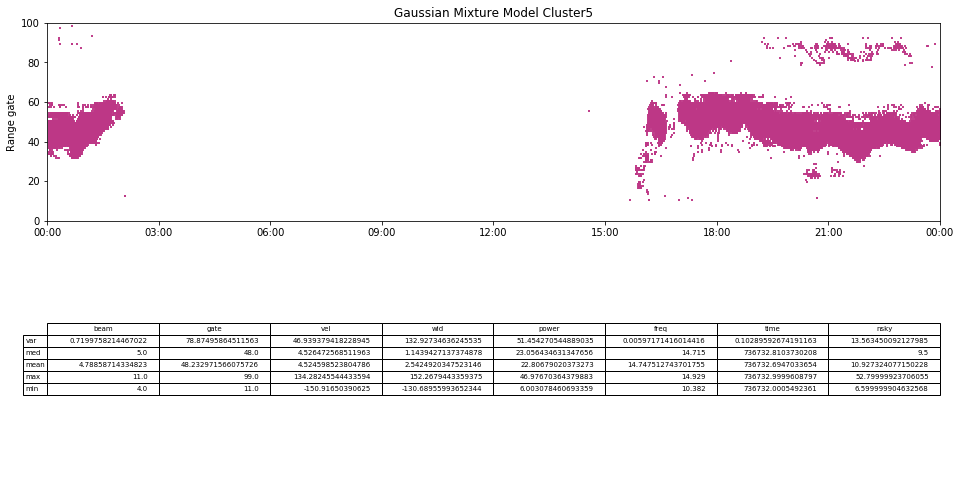

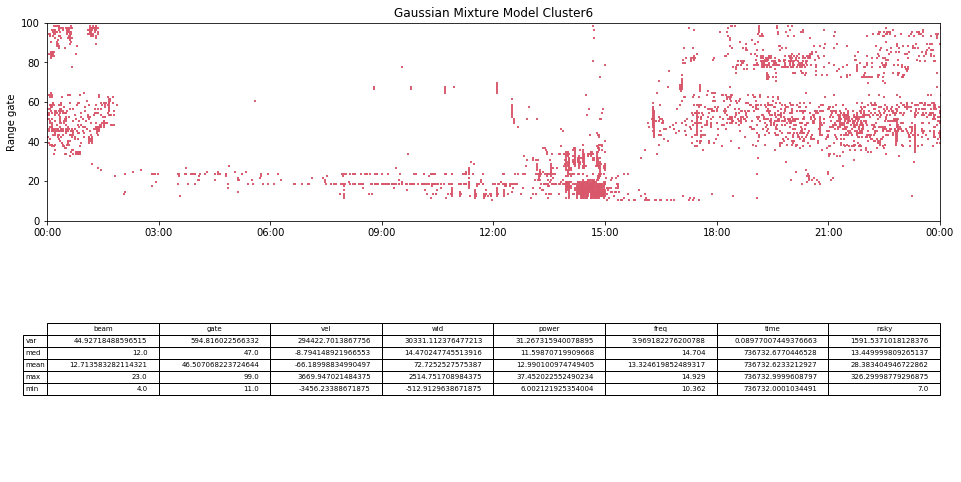

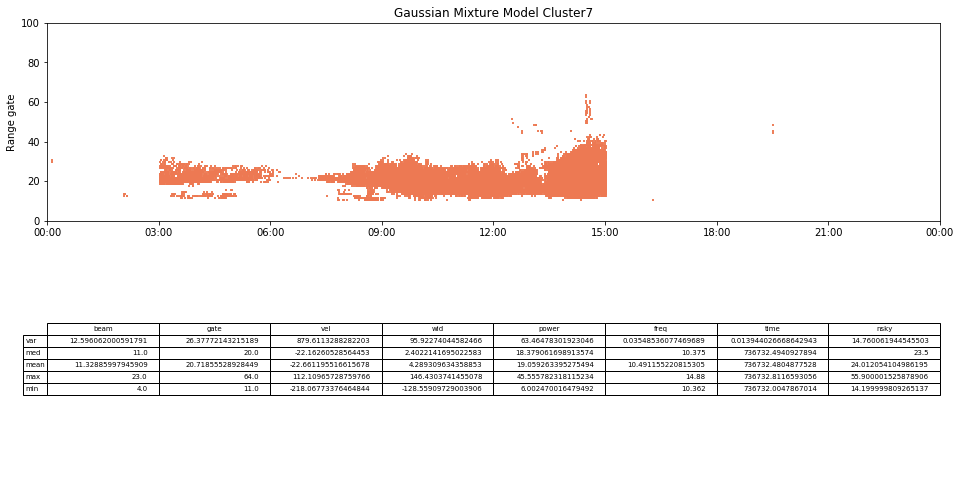

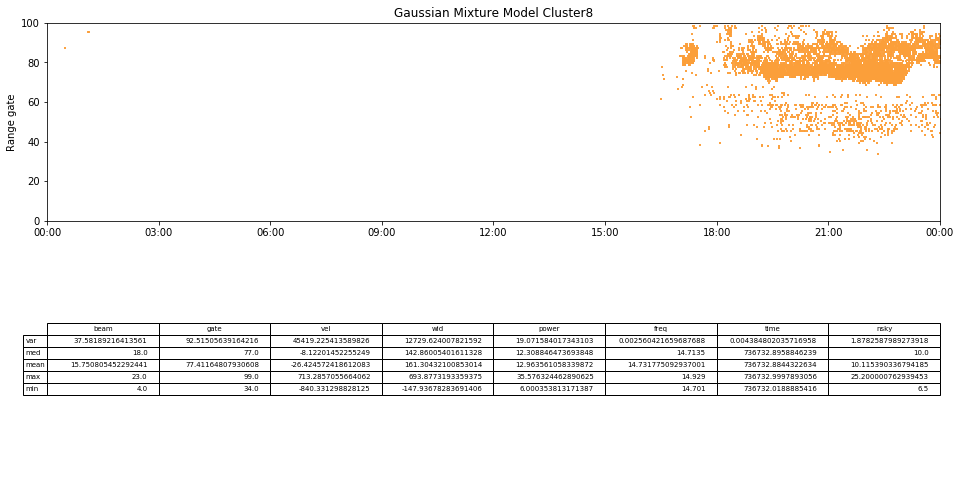

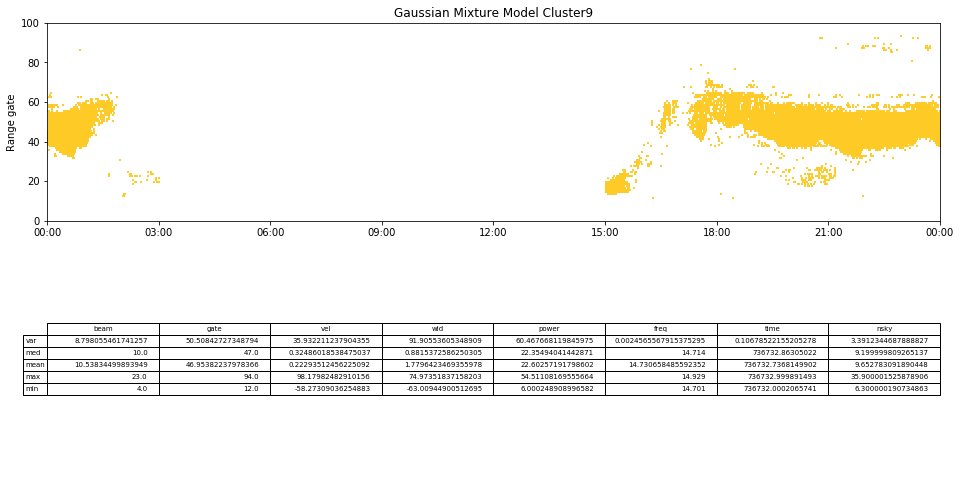

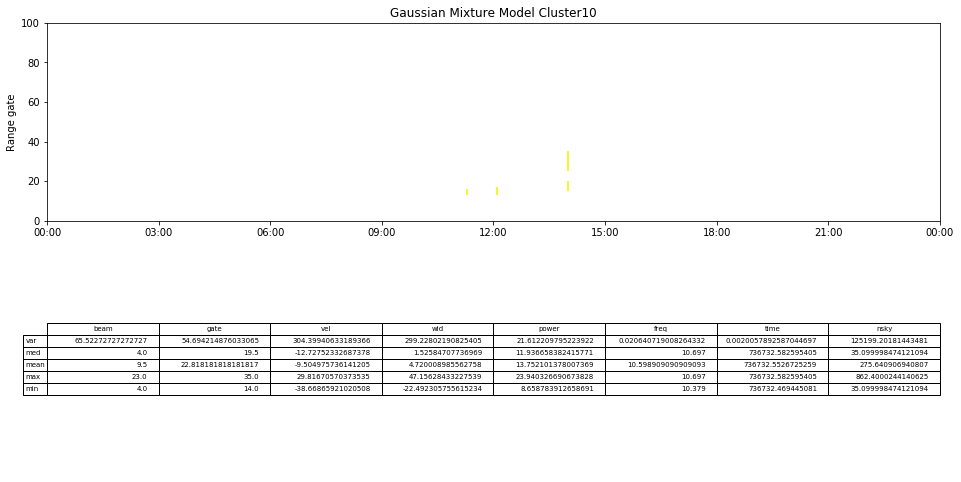

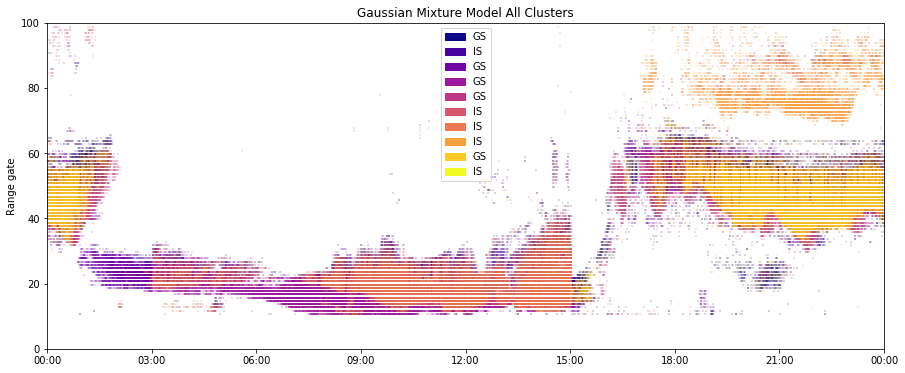

In [25]:
from plot_gmm_clusters import plot_gmm_clusters

plot_gmm_clusters(pca_data, data_flat_unscaled[:, feat_indicies], time, gate, vel, 
                  np.array(feature_names)[feat_indicies], range_max, s, e, save=False, num_clusters=10)